In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import periodogram

import pandas as pd
%matplotlib inline


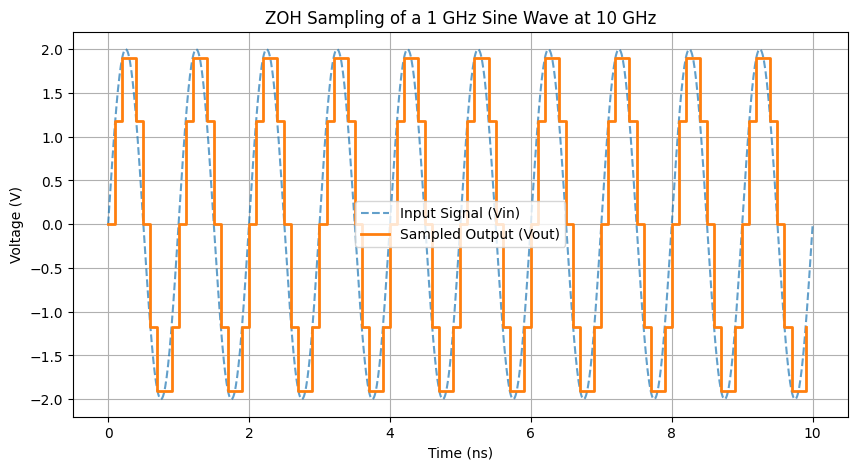

In [30]:
#First order model of a ZOH sampling circuit
# Define parameters
f_in = 1e9      # Input signal frequency (1 GHz)
f_s = 10e9      # Sampling frequency (10 GHz)
T_s = 1 / f_s   # Sampling period (100 ps)
A = 2           # Amplitude (2V)
tau = 10e-12    # Time constant (10 ps)
T_total = 10 / f_in  # Simulate for 10 cycles of input signal

# Time axis
num_samples = int(T_total / T_s)
t = np.linspace(0, T_total, num_samples * 10)  # High-resolution time vector

# Input signal (continuous)
Vin = A * np.sin(2 * np.pi * f_in * t)

# Sampled signal
sample_times = np.arange(0, T_total, T_s)
sampled_values = A * np.sin(2 * np.pi * f_in * sample_times)

# Zero-Order Hold (ZOH) implementation
Vout = np.zeros_like(t)
for i in range(len(sample_times) - 1):
    Vout[(t >= sample_times[i]) & (t < sample_times[i+1])] = sampled_values[i]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t * 1e9, Vin, label='Input Signal (Vin)', linestyle='dashed', alpha=0.7)
plt.step(sample_times * 1e9, sampled_values, where='post', label='Sampled Output (Vout)', linewidth=2)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title('ZOH Sampling of a 1 GHz Sine Wave at 10 GHz')
plt.legend()
plt.grid()
plt.show()

In [31]:
#Sampling Error
#a

# Given parameters
Vin_max = 0.5  # V (maximum amplitude of NRZ signal)
Ton = 50e-12   # 50 ps (ON time of the switch)
LSB = 1 / 128  # 7-bit ADC with 1V full scale

# Solve for tau using the derived equation
tau_min = Ton / (np.log(Vin_max) - np.log(LSB))

(tau_min)


1.2022458674074696e-11

In [33]:
#Sampling Error
#b

f_max = np.array([0.2e9 ,0.58e9 ,1e9 ,1.7e9 ,2.4e9 ]) # Hz
Ton_multitone = 0.5 / f_max  # 50% duty cycle -> ON time is half the period

# Solve for tau for the multi-tone case
tau_multitone = Ton_multitone / (np.log(Vin_max) - np.log(LSB))

tau_multitone

array([6.01122934e-10, 2.07283770e-10, 1.20224587e-10, 7.07203451e-11,
       5.00935778e-11])

In [28]:
##In class

#time constent

tau=264e-9 #ns
Ron= tau/33e-9

Ron_acutal=2 #ohms

#sampling error
#@10k, 100k
y =np.array([2.004,1.463,314.9e-3,-911.3e-3,-1.8646,-2.0373,-1.6685,-1.1339,-0.28222,36.23e-3])
y_hat=np.array([2.009,1.480,326.1e-3,-939.24e-3,-1.8646,-2.0373,-1.6766,-1.1232,-0.30936,13.94e-3])

print(len(y))
print(len(y_hat))

error = 0.0
for i in range(len(y)):
    error += (y_hat[i] - y[i]) ** 2
mse_100k= error / len(y)

#@20k, 200k

y =np.array([1.909,1.179,19.51e-3,-1.1566,-1.898,-1.947,-1.2124,-2.79e-3,1.168,1.789])
y_hat=np.array([1.898,1.201,13.94e-3,-1.1957,-1.8577,-1.9036,-1.1901,-8.36e-3,1.173,1.742])


print(len(y))
print(len(y_hat))

error = 0.0
for i in range(len(y)):
    error += (y_hat[i] - y[i]) ** 2
mse_200k= error / len(y)

(mse_100k,mse_200k)

10
10
10
10


(0.00026336072999999917, 0.00084347998)